# Zadanie nr 1:
Do tego zadania sporządziłem rysunek za pomocą narzędzia dostępnego z przeglądarki o nazwie
[Virtual Graph Paper](https://virtual-graph-paper.com/).
Stworzony przeze mnie rysunek wygląda następująco:

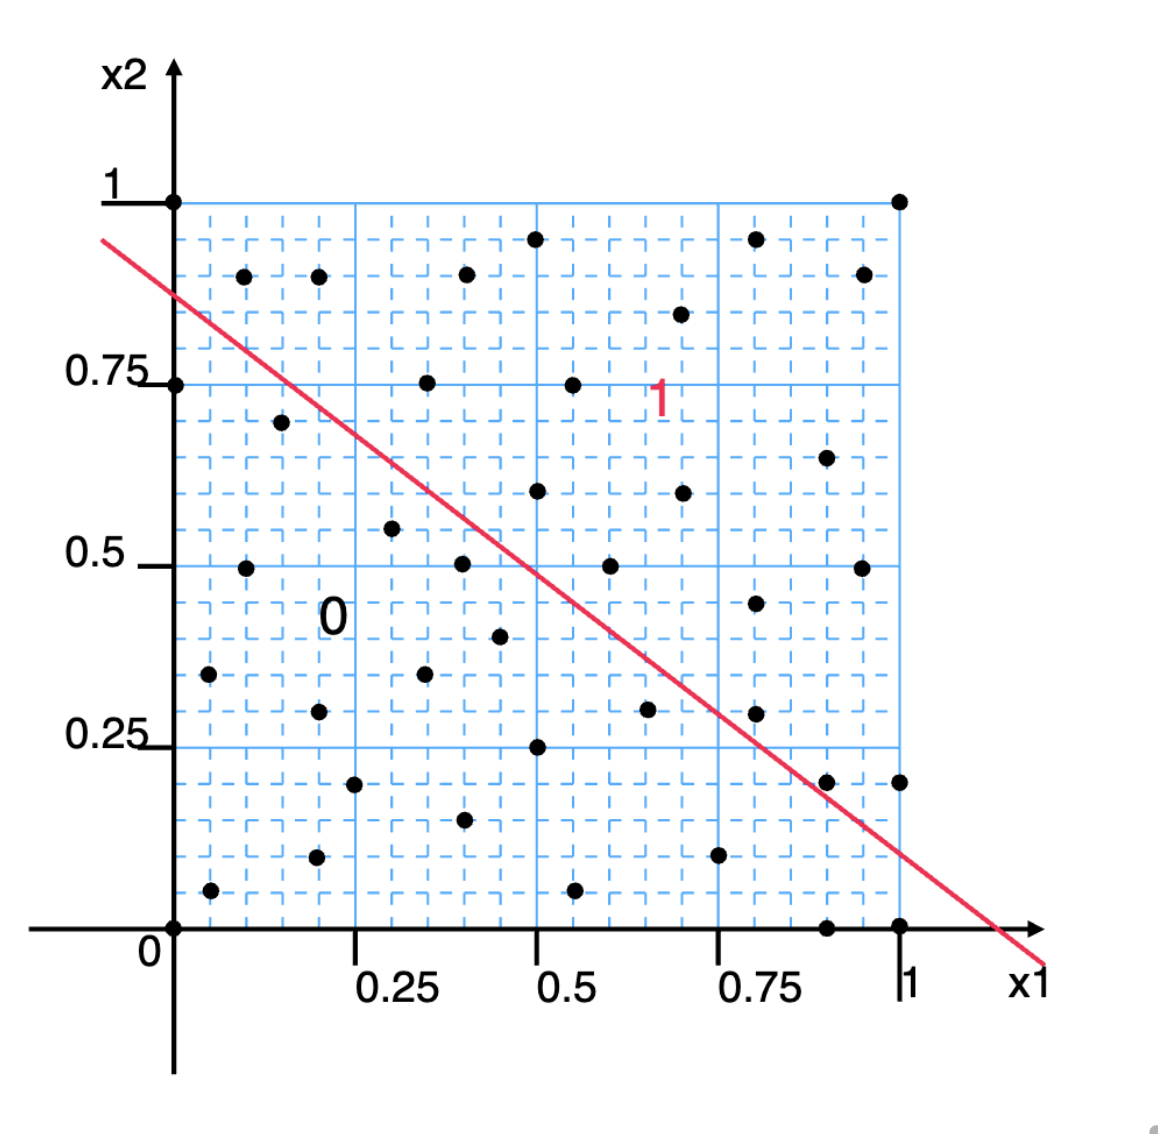

In [102]:
# wpisanie wartości do odpowiednich tabel:
import numpy as np

xx = np.array([[0.0,0.0],
               [0.0,0.75],
               [0.0,1.0],
               [0.05,0.05],
               [0.05,0.35],
               [0.1,0.5],
               [0.1,0.9],
               [0.15,0.7],
               [0.2,0.1],
               [0.2,0.3],
               [0.2,0.9],
               [0.25,0.2],
               [0.3,0.55],
               [0.35,0.35],
               [0.35,0.75],
               [0.4,0.15],
               [0.4,0.5],
               [0.4,0.9],
               [0.45,0.4],
               [0.5,0.25],
               [0.5,0.6],
               [0.5,0.95],
               [0.55,0.05],
               [0.55,0.75],
               [0.6,0.5],
               [0.65,0.3],
               [0.7,0.6],
               [0.7,0.85],
               [0.75,0.1],
               [0.8,0.3],
               [0.8,0.45],
               [0.8,0.95],
               [0.9,0.0],
               [0.9,0.2],
               [0.9,0.65],
               [0.95,0.5],
               [0.95,0.9],
               [1.0,0.0],
               [1.0,0.2],
               [1.0,1.0]
               ])
d = np.array([0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,1,0,1,1,0,1,1,1,0,1,1,1,1,0,1,1])



# Zadanie nr 2:
Graficzne przedstawienie danych za pomocą funkcji plot z biblioteki matplotlib.pyplot.
Punkty posiadające wartość 1 narysowane będą kolorem czerwonym, natomiast punkty o wartości 0 zostaną narysowane kolorem czarnym.

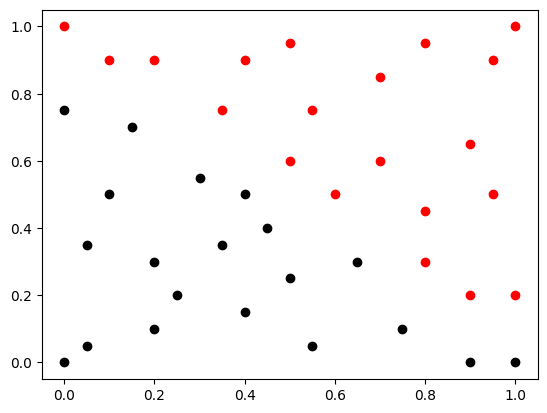

In [103]:
import matplotlib.pyplot as plt

for i in range(len(xx)):
  if d[i] == 1:
    plt.plot(xx[i,0],xx[i,1], 'ro')
  else:
    plt.plot(xx[i,0],xx[i,1], 'ko')

# Zadanie nr 3:


Wykres lini decyzyjnej nienauczonego perceptronu wraz z punktami
Czerwony kolor - poprawnie oznaczony
Czarny kolor - błędnie oznaczony


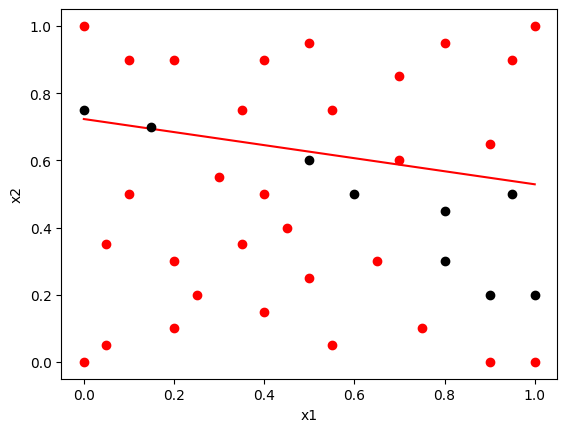

Wykres lini decyzyjnej nauczonego(red) i nienauczonego(blue) perceptronu wraz z punktami
Czerwony kolor - poprawnie oznaczony
Czarny kolor - błędnie oznaczony


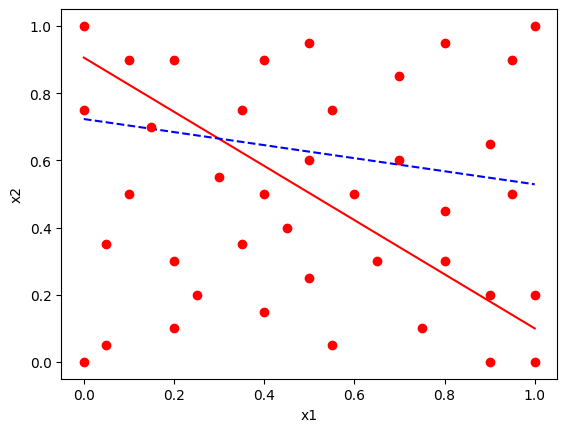

In [104]:
#Kod do zadania numer 1
import numpy as np
import matplotlib.pyplot as plt
#a:
def liczNeuronem(_x, _w):
  result = np.zeros(len(_x))
  for j in range(len(_x)):
    _xx = _x[j]
    s = 0
    for i in range(len(_w)):
      if i == 0:
        s+= _w[0] * (-1)
      else:
        s += _w[i] * _xx[i-1]
    if s >= 0:
      result[j] = 1
    else:
      result[j] = 0
  return result

def uczNeuron(_x, _w, _d, teta, times):
  newW = np.zeros(len(_w))
  for i in range(len(_w)):
    newW[i] = _w[i]
  for g in range(times):

    for j in range(len(_x)):
      _xx = _x[j]
      s = 0
      for i in range(len(_w)):
        if i == 0:
          s = newW[0] * (-1)
        else:
          s += newW[i] * _xx[i-1]
      if s >= 0:
        s = 1
      else:
        s = 0
      delta = _d[j] -s
      for k in range(len(newW)):
        if k == 0:
          newW[0] = newW[0] +teta*delta*(-1)
        else:
          newW[k] = newW[k] +teta*delta*_xx[k-1]
  return newW
#Punkty kolorowane:
#czerwony -  wynik perceptronu zgodny z oczekiwanymi wartościami
#czarny - wynik perceptronu niezgodny z oczekiwanymi wartościami
def showAxis2dMatch(_x,_w, _r, _d, compare = False, _oldW = np.array([])):
  _y = -(_w[1]/_w[2]) * _x[:,0] + (_w[0]/_w[2])
  plt.plot(_x[:,0], _y, 'r-' )
  if compare == True:
    _y2 = -(_oldW[1]/_oldW[2]) * _x[:,0] + (_oldW[0]/_oldW[2])
    plt.plot(_x[:,0], _y2, 'b--' )
  for i in range(len(_x)):
    if _r[i] == _d[i]:
      plt.plot(_x[i,0],_x[i,1], 'ro')
    else:
      plt.plot(_x[i,0],_x[i,1], 'ko')
  #plt.axis([-0.1,1.1,-0.1,1.1])
  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.show();
w0 = np.random.random(len(xx[0])+1)
#b:
r0 = liczNeuronem(xx,w0)
print("Wykres lini decyzyjnej nienauczonego perceptronu wraz z punktami\nCzerwony kolor - poprawnie oznaczony\nCzarny kolor - błędnie oznaczony")
showAxis2dMatch(xx,w0,r0,d)
#c:
print("Wykres lini decyzyjnej nauczonego(red) i nienauczonego(blue) perceptronu wraz z punktami\nCzerwony kolor - poprawnie oznaczony\nCzarny kolor - błędnie oznaczony")
w1 = uczNeuron(xx, w0, d, 0.1, 100)
r1 = liczNeuronem(xx,w1)
showAxis2dMatch(xx,w1,r1,d,True,w0)
